
# Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices.
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.



In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Initializing a Tensor

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.



In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa - see `bridge-to-np-label`).



In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.



In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8464, 0.7181],
        [0.1886, 0.6262]]) 



**With random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.



In [ ]:
shape = (2, 3, 4, )
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[[0.8725, 0.8032, 0.3353, 0.7528],
         [0.8332, 0.6662, 0.8636, 0.9249],
         [0.0663, 0.9831, 0.9248, 0.2397]],

        [[0.1878, 0.0029, 0.8481, 0.9924],
         [0.9938, 0.9882, 0.8540, 0.8764],
         [0.3865, 0.1931, 0.9016, 0.1674]]]) 

Ones Tensor: 
 tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]]) 

Zeros Tensor: 
 tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


## Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [ ]:
tensor = torch.ones(3,4, dtype = torch.int)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.int32
Device tensor is stored on: cpu


## Operations on Tensors

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing,
indexing, slicing), sampling and more are
comprehensively described [here](https://pytorch.org/docs/stable/torch.html)_.

Each of these operations can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using
``.to`` method (after checking for GPU availability). Keep in mind that copying large tensors
across devices can be expensive in terms of time and memory!



In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.




**Standard numpy-like indexing and slicing:**



In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[:, -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors** You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html)_,
another tensor joining operator that is subtly different from ``torch.cat``.



In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])



# Datasets & DataLoaders


## Loading a Dataset

Here is an example of how to load the [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) dataset from TorchVision.
Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations



In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 18723742.95it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305806.82it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5419860.34it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14688623.80it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Iterating and Visualizing the Dataset

We can index ``Datasets`` manually like a list: ``training_data[index]``.
We use ``matplotlib`` to visualize some samples in our training data.



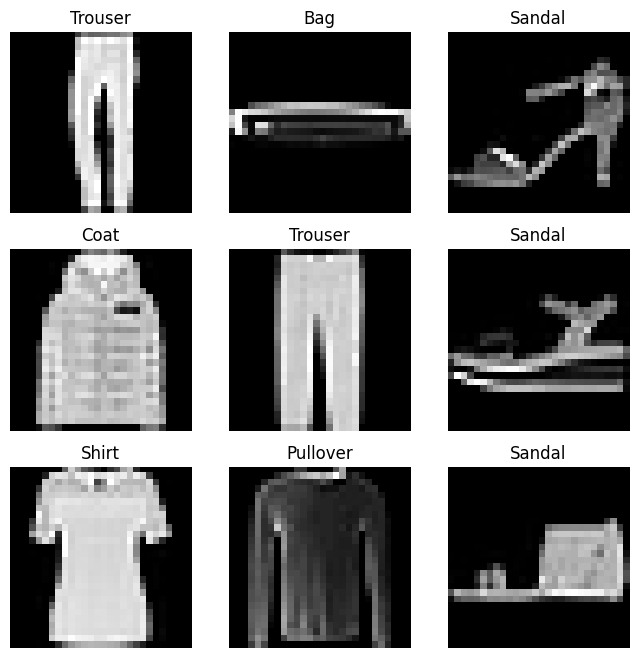

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset for your files

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`.
Take a look at this implementation; the FashionMNIST images are stored
in a directory ``img_dir``, and their labels are stored separately in a CSV file ``annotations_file``.

In the next sections, we'll break down what's happening in each of these functions.



In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### __init__

The __init__ function is run once when instantiating the Dataset object. We initialize
the directory containing the images, the annotations file, and both transforms (covered
in more detail in the next section).

The labels.csv file looks like: ::

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9



In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

### __len__

The __len__ function returns the number of samples in our dataset.

Example:



In [ ]:
def __len__(self):
    return len(self.img_labels)

### __getitem__

The __getitem__ function loads and returns a sample from the dataset at the given index ``idx``.
Based on the index, it identifies the image's location on disk, converts that to a tensor using ``read_image``, retrieves the
corresponding label from the csv data in ``self.img_labels``, calls the transform functions on them (if applicable), and returns the
tensor image and corresponding label in a tuple.



In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

--------------




## Preparing your data for training with DataLoaders
The ``Dataset`` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to
pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's ``multiprocessing`` to
speed up data retrieval.

``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.



In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

We have loaded that dataset into the ``DataLoader`` and can iterate through the dataset as needed.
Each iteration below returns a batch of ``train_features`` and ``train_labels`` (containing ``batch_size=64`` features and labels respectively).
Because we specified ``shuffle=True``, after we iterate over all batches the data is shuffled (for finer-grained control over
the data loading order, take a look at [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).



Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


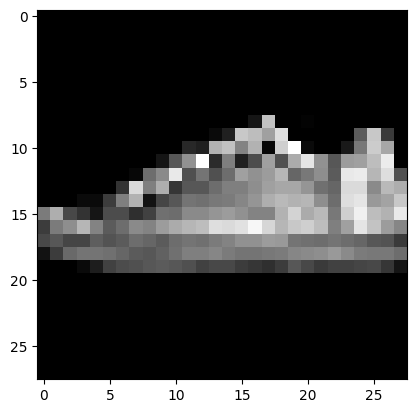

Label: 7


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Further Reading
- [torch.utils.data API](https://pytorch.org/docs/stable/data.html)



## Gradient Calculation with AutoGrad

In [ ]:
x = torch.randn(3, requires_grad = True)
print(x)

tensor([-0.2851,  1.3775, -0.8756], requires_grad=True)


In [ ]:
 y = x + 2

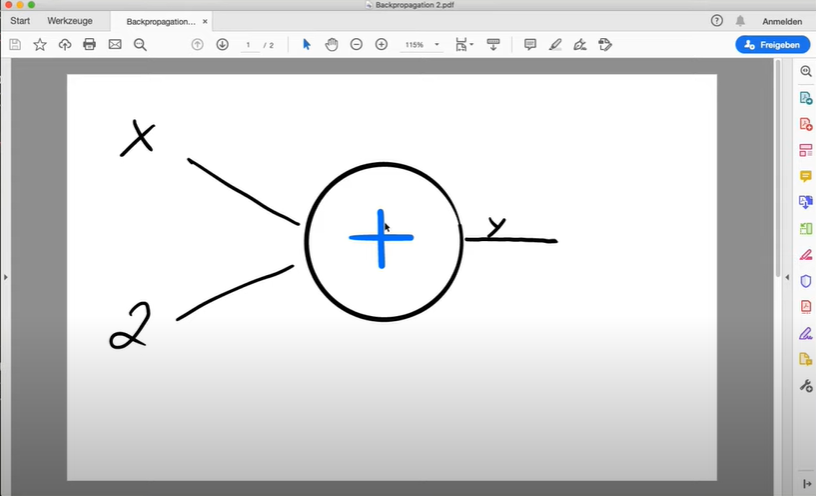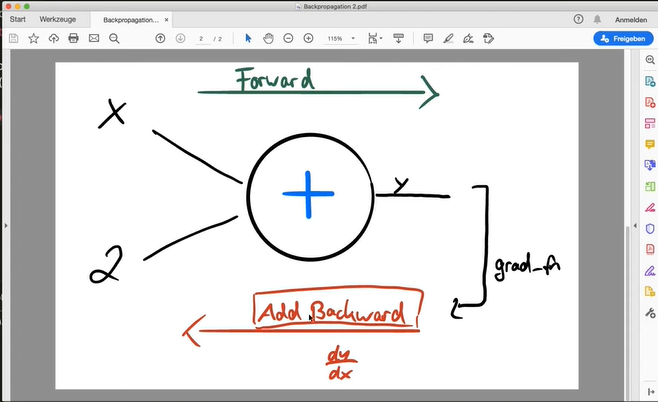

In [ ]:
print(y)

tensor([1.7149, 3.3775, 1.1244], grad_fn=<AddBackward0>)


In [ ]:
z = y * y * 2;
print(z)

tensor([ 5.8819, 22.8155,  2.5286], grad_fn=<MulBackward0>)


In [ ]:
z = z.mean()
print(z)

tensor(10.4087, grad_fn=<MeanBackward0>)


In [ ]:
z.backward() #dz/dx
print(x.grad)

tensor([2.2866, 4.5034, 1.4992])


In [ ]:
x = torch.randn(3, requires_grad = True)
y = x + 2
z = y * y * 2;
z = z.mean()
print(z)
z.backward() #dz/dx
print(x.grad)

tensor(6.9174, grad_fn=<MeanBackward0>)
tensor([3.7837, 1.9347, 0.6221])


In [ ]:
x = torch.randn(3, requires_grad = True)
y = x + 2
z = y * y * 2;
# z = z.mean()
v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float32)
print(z)
z.backward(v) #dz/dx
print(x.grad)

tensor([ 6.4883,  3.4290, 18.1835], grad_fn=<MulBackward0>)
tensor([0.7205, 5.2376, 0.0121])


In [ ]:
#x.requires_grad(False)
#x.detach()
#with torch.no_grad()

In [ ]:
x = torch.randn(3, requires_grad = True)
x.requires_grad_(False)
print(x)

tensor([ 0.7742, -0.5169,  0.8510])


In [ ]:
x = torch.randn(3, requires_grad = True)
y = x.detach()
print(y)

tensor([-0.4234, -0.2708,  0.3635])


In [ ]:
x = torch.randn(3, requires_grad = True)
with torch.no_grad():
  y = x + 2
  print(y)

tensor([3.1876, 1.9684, 1.3567])


In [ ]:
weights = torch.ones(4, requires_grad = True)
for epoch in range(3):
  model_output = (weights * 3).sum()

  model_output.backward()

  print(weights.grad)

  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## Gradient Descent with Autograd and Backpropagation
###Linear Regression
1. **Prediction** : Manually
2. **Gradient Computation** : Manually
3. **Loss Computation**: Manually
4. **Parameter updates**: Manually

In [ ]:
# f = w * x
# f = 2 * x

X = np.array([1, 2, 3, 4], dtype = np.float32)
Y = np.array([2, 4, 6, 8], dtype = np.float32)

w = 0.0

#model prediction
def forward(x):
  return w * x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

#gradient
#MSE = 1 / N * (w * x - y) ** 2
# dJ/dw = 1/N * 2x *(w*x - y)

def gradient(x, y, y_predicted):
  return np.dot(2*x, y_predicted - y).mean();

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  #prediction = forward
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  dw = gradient(X, Y, y_pred)

  #update weights
  w -= learning_rate * dw

  if(epoch % 1 == 0):
    print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8}')

print(f'Prediction before training: f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.0
epoch 2: w = 1.680, loss = 4.7999992
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288
epoch 5: w = 1.980, loss = 0.019660834
epoch 6: w = 1.992, loss = 0.0031457357
epoch 7: w = 1.997, loss = 0.00050330802
epoch 8: w = 1.999, loss = 8.0531863e-05
epoch 9: w = 1.999, loss = 1.2884395e-05
epoch 10: w = 2.000, loss = 2.0613531e-06
epoch 11: w = 2.000, loss = 3.2973401e-07
epoch 12: w = 2.000, loss = 5.2823452e-08
epoch 13: w = 2.000, loss = 8.4878167e-09
epoch 14: w = 2.000, loss = 1.3369572e-09
epoch 15: w = 2.000, loss = 2.1679014e-10
epoch 16: w = 2.000, loss = 3.5313974e-11
epoch 17: w = 2.000, loss = 5.0768278e-12
epoch 18: w = 2.000, loss = 8.9883656e-13
epoch 19: w = 2.000, loss = 1.3145041e-13
epoch 20: w = 2.000, loss = 1.3145041e-13
epoch 21: w = 2.000, loss = 0.0
epoch 22: w = 2.000, loss = 0.0
epoch 23: w = 2.000, loss = 0.0
epoch 24: w = 2.000, loss = 0.0
epoch 25: w = 2.000, loss


1. **Prediction** : Manually
2. **Gradient Computation** : Autograd
3. **Loss Computation**: Manually
4. **Parameter updates**: Manually

In [ ]:
# f = w * x
# f = 2 * x

X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)

# w = 0.0
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

#model prediction
def forward(x):
  return w * x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

#gradient
#MSE = 1 / N * (w * x - y) ** 2
# dJ/dw = 1/N * 2x *(w*x - y)

# def gradient(x, y, y_predicted):
#   return np.dot(2*x, y_predicted - y).mean();

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  #prediction = forward
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  # dw = gradient(X, Y, y_pred)
  l.backward()

  #update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero gradients
  w.grad.zero_()

  if(epoch % 1 == 0):
    print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8}')

print(f'Prediction before training: f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.0
epoch 2: w = 0.555, loss = 21.674999
epoch 3: w = 0.772, loss = 15.660188
epoch 4: w = 0.956, loss = 11.314487
epoch 5: w = 1.113, loss = 8.1747169
epoch 6: w = 1.246, loss = 5.9062324
epoch 7: w = 1.359, loss = 4.2672529
epoch 8: w = 1.455, loss = 3.0830898
epoch 9: w = 1.537, loss = 2.2275321
epoch 10: w = 1.606, loss = 1.6093917
epoch 11: w = 1.665, loss = 1.1627856
epoch 12: w = 1.716, loss = 0.84011245
epoch 13: w = 1.758, loss = 0.60698116
epoch 14: w = 1.794, loss = 0.43854395
epoch 15: w = 1.825, loss = 0.3168478
epoch 16: w = 1.851, loss = 0.22892261
epoch 17: w = 1.874, loss = 0.16539653
epoch 18: w = 1.893, loss = 0.11949898
epoch 19: w = 1.909, loss = 0.086338058
epoch 20: w = 1.922, loss = 0.062379144
epoch 21: w = 1.934, loss = 0.045068897
epoch 22: w = 1.944, loss = 0.032562312
epoch 23: w = 1.952, loss = 0.023526315
epoch 24: w = 1.960, loss = 0.016997725
epoch 25: w = 1.966, loss = 0.012280837
epo

1. **Prediction** : Manually
2. **Gradient Computation** : Autograd
3. **Loss Computation**: Pytorch Loss
4. **Parameter updates**: Pytorch Optimizer

In [ ]:
# 1 ) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
# - forward pass: compute prediction
# - backward pass : gradients
# - update weights

# f = w * x
# f = 2 * x

import torch.nn as nn

X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)

# w = 0.0
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

#model prediction
def forward(x):
  return w * x

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = learning_rate)

for epoch in range(n_iters):
  #prediction = forward
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  # dw = gradient(X, Y, y_pred)
  l.backward()

  #update weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if(epoch % 1 == 0):
    print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8}')

print(f'Prediction before training: f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.0
epoch 2: w = 0.555, loss = 21.674999
epoch 3: w = 0.772, loss = 15.660188
epoch 4: w = 0.956, loss = 11.314487
epoch 5: w = 1.113, loss = 8.1747169
epoch 6: w = 1.246, loss = 5.9062324
epoch 7: w = 1.359, loss = 4.2672529
epoch 8: w = 1.455, loss = 3.0830898
epoch 9: w = 1.537, loss = 2.2275321
epoch 10: w = 1.606, loss = 1.6093917
epoch 11: w = 1.665, loss = 1.1627856
epoch 12: w = 1.716, loss = 0.84011245
epoch 13: w = 1.758, loss = 0.60698116
epoch 14: w = 1.794, loss = 0.43854395
epoch 15: w = 1.825, loss = 0.3168478
epoch 16: w = 1.851, loss = 0.22892261
epoch 17: w = 1.874, loss = 0.16539653
epoch 18: w = 1.893, loss = 0.11949898
epoch 19: w = 1.909, loss = 0.086338058
epoch 20: w = 1.922, loss = 0.062379144
epoch 21: w = 1.934, loss = 0.045068897
epoch 22: w = 1.944, loss = 0.032562312
epoch 23: w = 1.952, loss = 0.023526315
epoch 24: w = 1.960, loss = 0.016997725
epoch 25: w = 1.966, loss = 0.012280837
epo

1. **Prediction** : Pytorch Model
2. **Gradient Computation** : Autograd
3. **Loss Computation**: Pytorch Loss
4. **Parameter updates**: Pytorch Optimizer

In [ ]:
# 1 ) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
# - forward pass: compute prediction
# - backward pass : gradients
# - update weights

# f = w * x
# f = 2 * x

import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)

X_test = torch.tensor([5], dtype = torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iters):
  #prediction = forward
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  # dw = gradient(X, Y, y_pred)
  l.backward()

  #update weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if(epoch % 1 == 0):
    [w, b] = model.parameters()
    print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')


4 1
Prediction before training: f(5) = 4.718
epoch 1: w = 0.888, loss = 6.5954266
epoch 2: w = 1.004, loss = 4.6553869
epoch 3: w = 1.100, loss = 3.3087635
epoch 4: w = 1.181, loss = 2.3739002
epoch 5: w = 1.249, loss = 1.7247515
epoch 6: w = 1.305, loss = 1.2738576
epoch 7: w = 1.353, loss = 0.96053076
epoch 8: w = 1.392, loss = 0.74266195
epoch 9: w = 1.425, loss = 0.59103215
epoch 10: w = 1.453, loss = 0.48536626
epoch 11: w = 1.477, loss = 0.41159737
epoch 12: w = 1.496, loss = 0.3599633
epoch 13: w = 1.513, loss = 0.32369071
epoch 14: w = 1.527, loss = 0.29808027
epoch 15: w = 1.539, loss = 0.27987024
epoch 16: w = 1.549, loss = 0.26679796
epoch 17: w = 1.557, loss = 0.25729337
epoch 18: w = 1.565, loss = 0.25026697
epoch 19: w = 1.571, loss = 0.24496232
epoch 20: w = 1.577, loss = 0.24085532
epoch 21: w = 1.581, loss = 0.23758174
epoch 22: w = 1.586, loss = 0.23488912
epoch 23: w = 1.589, loss = 0.2326019
epoch 24: w = 1.592, loss = 0.23059888
epoch 25: w = 1.595, loss = 0.228795

In [ ]:
# 1 ) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
# - forward pass: compute prediction
# - backward pass : gradients
# - update weights

# f = w * x
# f = 2 * x

import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)

X_test = torch.tensor([5], dtype = torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)


print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iters):
  #prediction = forward
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  # dw = gradient(X, Y, y_pred)
  l.backward()

  #update weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if(epoch % 1 == 0):
    [w, b] = model.parameters()
    print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')


4 1
Prediction before training: f(5) = 2.436
epoch 1: w = 0.536, loss = 14.906507
epoch 2: w = 0.711, loss = 10.420074
epoch 3: w = 0.858, loss = 7.3065767
epoch 4: w = 0.980, loss = 5.1457291
epoch 5: w = 1.082, loss = 3.6459098
epoch 6: w = 1.168, loss = 2.6047668
epoch 7: w = 1.239, loss = 1.8818903
epoch 8: w = 1.298, loss = 1.3798565
epoch 9: w = 1.348, loss = 1.0310633
epoch 10: w = 1.390, loss = 0.78860247
epoch 11: w = 1.425, loss = 0.61992687
epoch 12: w = 1.454, loss = 0.50245202
epoch 13: w = 1.479, loss = 0.42050624
epoch 14: w = 1.499, loss = 0.36321574
epoch 15: w = 1.517, loss = 0.32303631
epoch 16: w = 1.531, loss = 0.29473186
epoch 17: w = 1.544, loss = 0.27467006
epoch 18: w = 1.554, loss = 0.26033026
epoch 19: w = 1.563, loss = 0.24996305
epoch 20: w = 1.571, loss = 0.24235496
epoch 21: w = 1.578, loss = 0.236664
epoch 22: w = 1.583, loss = 0.23230562
epoch 23: w = 1.588, loss = 0.22887431
epoch 24: w = 1.593, loss = 0.22608869
epoch 25: w = 1.596, loss = 0.22375374


## Softmax and CrossEntropy

In [ ]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis = 0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]


In [ ]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim = 0)
print('softmax pytorch:', outputs)

softmax pytorch: tensor([0.6590, 0.2424, 0.0986])


In [ ]:
def cross_entropy(actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]

Y = np.array([1, 0, 0])

# y_pred has probabilities
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


In [ ]:
loss = nn.CrossEntropyLoss()

Y = torch.tensor([1.0, 0.0, 0.0])
Y_pred_good = torch.tensor([2.0, 1.0, 0.1])
Y_pred_bad = torch.tensor([0.5, 2.0, 0.3])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

0.4170299470424652
1.840616226196289


**Careful!**

**nn.CrossEntropyLoss** applies nn.**LogSoftmax + nn.NLLLoss** (negative log likelihood loss)

No Softmax in last layer!

Y has class labels, one One-Hot!

Y_pred has raw scores (logits), no Softmax!

In [ ]:
_, prediction1 = torch.max(Y_pred_good, 0)
_, prediction2 = torch.max(Y_pred_bad, 0)
print(prediction1)
print(prediction2)

tensor(0)
tensor(1)


##Implementation of Neural Network with Softmax for Multiclass Classification Problem

 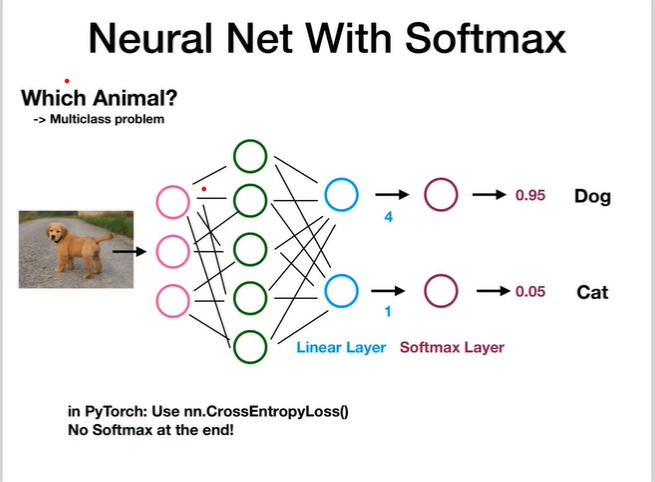

In [ ]:
# Multiclass problem
class NeuralNet2(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    # no softmax at the end
    return out

model = NeuralNet2(input_size = 28 * 28, hidden_size = 5, num_classes = 3)
criterion = nn.CrossEntropyLoss() #(applies Softmax)

##Implementation of Neural Network with Sigmoid for Binary Classification Problem

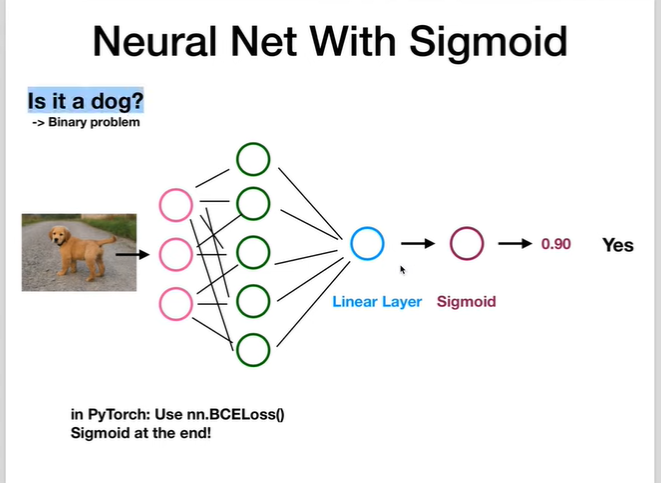

In [ ]:
# Binary Classification problem
class NeuralNet2(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    # sigmoid at the end
    y_pred = torch.sigmoid(out)
    return out

model = NeuralNet2(input_size = 28 * 28, hidden_size = 5)
criterion = nn.BCELoss() #(applies Softmax)